Linguist 278: Programming for Linguists<br />
Stanford Linguistics, Fall 2021<br />
Christopher Potts

# Class 12: Introduction to Pandas

* [Pandas](https://pandas.pydata.org) is an amazing, powerful, flexible library for doing reproducible research efficiently and effectively. 

* We will be able to cover only a tiny percentage of the things it can do.

* Thus, to create this notebook, I reviewed the work in Pandas that I've done over the years,  identified the most common operations, and assembled them here as a bunch of code snippets with notes interspersed.

* My hope is that this gives you enough of a feel for Pandas that you'll be able to explore and make use of its other functionality by reviewing [its documentation](http://pandas.pydata.org/pandas-docs/stable/) and Googling for Stack Exchange discussions.

In [1]:
%matplotlib inline
import os
import pandas as pd
import random

## Contents

1. [Reading CSVs into DataFrame objects](#Reading-CSVs-into-DataFrame-objects)
0. [DataFrame shapes](#DataFrame-shapes)
0. [Creating DataFrames in other ways](#Creating-DataFrames-in-other-ways)
0. [Columns as Series](#Columns-as-Series)
0. [Creating a Series directly](#Creating-a-Series-directly)
0. [Common series methods](#Common-series-methods)
0. [Indexing into Series](#Indexing-into-Series)
0. [Getting the values from a DataFrame or Series](#Getting-the-values-from-a-DataFrame-or-Series)
0. [Adding columns to a DataFrame](#Adding-columns-to-a-DataFrame)
0. [Subframes based on columns](#Subframes-based-on-columns)
0. [DataFrames heads and tails](#DataFrames-heads-and-tails)
0. [Getting specific DataFrame rows](#Getting-specific-DataFrame-rows)
0. [Subframes based on specifc row values](#Subframes-based-on-specifc-row-values)
  1. [Creating Boolean Series](#Creating-Boolean-Series)
  0. [Boolean series as filter](#Boolean-series-as-filter)
  0. [Set-based example](#Set-based-example)
0. [Sorting](#Sorting)
  1. [Based on the index](#Based-on-the-index)
  0. [Based on a single column](#Based-on-a-single-column)
  0. [Multiple columns at once](#Multiple-columns-at-once)
0. [value_counts](#value_counts)
0. [apply on Series](#apply-on-Series)
0. [apply on DataFrame](#apply-on-DataFrame)
0. [groupby](#groupby)
0. [Basic plotting](#Basic-plotting)
  1. [Basic plot – just try it!](#Basic-plot-–-just-try-it!)
  0. [Barplot](#Barplot)
  0. [Boxplot](#Boxplot)

## Reading CSVs into DataFrame objects

The [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function is an incredibly powerful and flexible tool for reading in CSV files. It can handle multiple formats for its input, it will infer types for columns on import, and many other things. 

In [2]:
toy_df = pd.read_csv(
    "http://web.stanford.edu/class/linguist278/data/toy-csv.csv")

Here, `toy_df` is a `pd.DataFrame`. These are like spreadsheets, and like `data.frame` objects in the programming language R. They display nicely in notebooks:

In [3]:
toy_df.head()

Subject     Height    Occupation
0        1  74.370003  Psychologist
1        2  67.496862  Psychologist
2        3  74.923564  Psychologist
3        4  64.623722  Psychologist
4        5  67.767879      Linguist

We can specify that we want the Subject column to be the `pd.Index` for this DataFrame:

In [4]:
toy_df = pd.read_csv(
    "http://web.stanford.edu/class/linguist278/data/toy-csv.csv",
    index_col=0)

## DataFrame shapes

In [5]:
toy_df.shape

(10, 2)

## Creating DataFrames in other ways

In [6]:
pd.DataFrame(
    {
        "lower": ["a", "b", "c"], 
        "upper": ["A", "B", "C"]
    })

lower upper
0     a     A
1     b     B
2     c     C

In [7]:
pd.DataFrame(
    [
        ["a", "A"], 
        ["b", "B"], 
        ["c", "C"]
    ], 
    columns=["lower", "upper"])

lower upper
0     a     A
1     b     B
2     c     C

## Columns as Series

The columns in DataFrames are `pd.Series` objects. You can pull them out by indexing directly into the `pd.DataFrame` with the column name (as a `str`):

In [8]:
toy_df['Height']

Subject
1     74.370003
2     67.496862
3     74.923564
4     64.623722
5     67.767879
6     61.503977
7     62.736810
8     68.608040
9     70.160905
10    76.811444
Name: Height, dtype: float64

## Creating a Series directly

In [9]:
pd.Series(["a", "b", "c"], name="lower")

0    a
1    b
2    c
Name: lower, dtype: object

## Common series methods

In [10]:
toy_df['Height'].mean()

68.9003206602722

In [11]:
toy_df['Height'].max()

76.81144438287173

In [12]:
toy_df['Height'].min()

61.50397707923559

In [13]:
toy_df['Height'].median()

68.18795942394993

In [14]:
toy_df['Height'] - toy_df['Height'].min()

Subject
1     12.866026
2      5.992885
3     13.419587
4      3.119745
5      6.263902
6      0.000000
7      1.232833
8      7.104063
9      8.656928
10    15.307467
Name: Height, dtype: float64

In [15]:
toy_df['Height'] * 2.54

Subject
1     188.899808
2     171.442030
3     190.305853
4     164.144254
5     172.130413
6     156.220102
7     159.351496
8     174.264421
9     178.208699
10    195.101069
Name: Height, dtype: float64

## Indexing into Series

They are pretty much like dictionaries where the keys are the `pd.Index` values:

In [16]:
height = toy_df['Height']

In [17]:
height[1]

74.37000326528937

## Getting the values from a DataFrame or Series

If the Pandas object proves stubborn, the `values` attribute will return a NumPy array, which will behave very much like a list. (If even the array is vexing, call `list` on it.)

In [18]:
toy_df.values

array([[74.37000326528937, 'Psychologist'],
       [67.4968620693749, 'Psychologist'],
       [74.92356434760966, 'Psychologist'],
       [64.62372198999978, 'Psychologist'],
       [67.76787900026083, 'Linguist'],
       [61.50397707923559, 'Psychologist'],
       [62.736809619085655, 'Psychologist'],
       [68.60803984763902, 'Linguist'],
       [70.16090500135535, 'Psychologist'],
       [76.81144438287173, 'Linguist']], dtype=object)

In [19]:
toy_df['Height'].values

array([74.37000327, 67.49686207, 74.92356435, 64.62372199, 67.767879  ,
       61.50397708, 62.73680962, 68.60803985, 70.160905  , 76.81144438])

## Adding columns to a DataFrame

In [20]:
# Some random ages for a dummy column:

ages = []
for i in range(toy_df.shape[0]):
    ages.append(random.randint(18, 100))

In [21]:
toy_df['Age'] = ages

In [22]:
toy_df.head()

Height    Occupation  Age
Subject                              
1        74.370003  Psychologist   80
2        67.496862  Psychologist   20
3        74.923564  Psychologist   81
4        64.623722  Psychologist   29
5        67.767879      Linguist   47

## Subframes based on columns

If you index into a DataFrame with a list of column names, you get the subframe containing those columns, in the order you specified:

In [23]:
toy_df[['Occupation']].head()

Occupation
Subject              
1        Psychologist
2        Psychologist
3        Psychologist
4        Psychologist
5            Linguist

You can use this to change the order of the columns:

In [24]:
toy_df[['Occupation', 'Height']].head()

Occupation     Height
Subject                         
1        Psychologist  74.370003
2        Psychologist  67.496862
3        Psychologist  74.923564
4        Psychologist  64.623722
5            Linguist  67.767879

## DataFrames heads and tails

In [25]:
toy_df.head(2)

Height    Occupation  Age
Subject                              
1        74.370003  Psychologist   80
2        67.496862  Psychologist   20

In [26]:
toy_df.tail(2)

Height    Occupation  Age
Subject                              
9        70.160905  Psychologist   58
10       76.811444      Linguist   65

## Getting specific DataFrame rows

To get specific rows based on the name of the value in the Index:

In [27]:
toy_df.loc[1]

Height               74.37
Occupation    Psychologist
Age                     80
Name: 1, dtype: object

And based on the index:

In [28]:
toy_df.iloc[0]

Height               74.37
Occupation    Psychologist
Age                     80
Name: 1, dtype: object

List indexing to get multiple rows:

In [29]:
toy_df.loc[[1,5]]

Height    Occupation  Age
Subject                              
1        74.370003  Psychologist   80
5        67.767879      Linguist   47

Index version:

In [30]:
toy_df.iloc[[1,5]]

Height    Occupation  Age
Subject                              
2        67.496862  Psychologist   20
6        61.503977  Psychologist   26

## Subframes based on specifc row values

### Creating Boolean Series

In [31]:
toy_df['Occupation'] == 'Linguist'

Subject
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10     True
Name: Occupation, dtype: bool

### Boolean series as filter

In [32]:
toy_df[ toy_df['Occupation'] == 'Linguist' ]

Height Occupation  Age
Subject                           
5        67.767879   Linguist   47
8        68.608040   Linguist  100
10       76.811444   Linguist   65

### Set-based example

In [33]:
target_professions = {'Linguist'}

toy_df[ toy_df['Occupation'].isin(target_professions) ]

Height Occupation  Age
Subject                           
5        67.767879   Linguist   47
8        68.608040   Linguist  100
10       76.811444   Linguist   65

## Sorting

### Based on the index

In [34]:
toy_df.sort_index()

Height    Occupation  Age
Subject                              
1        74.370003  Psychologist   80
2        67.496862  Psychologist   20
3        74.923564  Psychologist   81
4        64.623722  Psychologist   29
5        67.767879      Linguist   47
6        61.503977  Psychologist   26
7        62.736810  Psychologist  100
8        68.608040      Linguist  100
9        70.160905  Psychologist   58
10       76.811444      Linguist   65

### Based on a single column

In [35]:
toy_df.sort_values('Occupation')

Height    Occupation  Age
Subject                              
5        67.767879      Linguist   47
8        68.608040      Linguist  100
10       76.811444      Linguist   65
1        74.370003  Psychologist   80
2        67.496862  Psychologist   20
3        74.923564  Psychologist   81
4        64.623722  Psychologist   29
6        61.503977  Psychologist   26
7        62.736810  Psychologist  100
9        70.160905  Psychologist   58

In [36]:
toy_df.sort_values('Occupation', ascending=False)

Height    Occupation  Age
Subject                              
1        74.370003  Psychologist   80
2        67.496862  Psychologist   20
3        74.923564  Psychologist   81
4        64.623722  Psychologist   29
6        61.503977  Psychologist   26
7        62.736810  Psychologist  100
9        70.160905  Psychologist   58
5        67.767879      Linguist   47
8        68.608040      Linguist  100
10       76.811444      Linguist   65

### Multiple columns at once

In [37]:
toy_df.sort_values(['Occupation', 'Height'])

Height    Occupation  Age
Subject                              
5        67.767879      Linguist   47
8        68.608040      Linguist  100
10       76.811444      Linguist   65
6        61.503977  Psychologist   26
7        62.736810  Psychologist  100
4        64.623722  Psychologist   29
2        67.496862  Psychologist   20
9        70.160905  Psychologist   58
1        74.370003  Psychologist   80
3        74.923564  Psychologist   81

In [38]:
toy_df.sort_values(['Height', 'Occupation'])

Height    Occupation  Age
Subject                              
6        61.503977  Psychologist   26
7        62.736810  Psychologist  100
4        64.623722  Psychologist   29
2        67.496862  Psychologist   20
5        67.767879      Linguist   47
8        68.608040      Linguist  100
9        70.160905  Psychologist   58
1        74.370003  Psychologist   80
3        74.923564  Psychologist   81
10       76.811444      Linguist   65

## value_counts

In [39]:
toy_df['Occupation'].value_counts()

Psychologist    7
Linguist        3
Name: Occupation, dtype: int64

## apply on Series

This is a method on Series. It takes as its argument a single function, which is applied to every element in the Series.

In [40]:
def convert_inches_to_cm(x):
    return x * 2.54

In [41]:
toy_df['Height'].apply(convert_inches_to_cm)

Subject
1     188.899808
2     171.442030
3     190.305853
4     164.144254
5     172.130413
6     156.220102
7     159.351496
8     174.264421
9     178.208699
10    195.101069
Name: Height, dtype: float64

## apply on DataFrame

When you have the entire DataFrame at your disposal, you have to decide whether you want to call your `apply` function on the rows (`axis=1`) or on the columns (`axis=0`, the default).

In [42]:
def create_summary(row):
    return "Subject {} is a {} with height {} inches".format(
        row.name, row['Occupation'], row['Height'])    

In [43]:
toy_df.apply(create_summary, axis=1)

Subject
1     Subject 1 is a Psychologist with height 74.370...
2     Subject 2 is a Psychologist with height 67.496...
3     Subject 3 is a Psychologist with height 74.923...
4     Subject 4 is a Psychologist with height 64.623...
5     Subject 5 is a Linguist with height 67.7678790...
6     Subject 6 is a Psychologist with height 61.503...
7     Subject 7 is a Psychologist with height 62.736...
8     Subject 8 is a Linguist with height 68.6080398...
9     Subject 9 is a Psychologist with height 70.160...
10    Subject 10 is a Linguist with height 76.811444...
dtype: object

## groupby

In [44]:
toy_df.groupby('Occupation')

In [45]:
name, group = next(iter(toy_df.groupby('Occupation')))

In [46]:
name

'Linguist'

In [47]:
group

Height Occupation  Age
Subject                           
5        67.767879   Linguist   47
8        68.608040   Linguist  100
10       76.811444   Linguist   65

In [48]:
def series_mean(s):
    return s.mean()

In [49]:
toy_df.groupby('Occupation').apply(series_mean)

Height        Age
Occupation                        
Linguist      71.062454  70.666667
Psychologist  67.973692  56.285714

## Basic plotting

Remember to put 

```%matplotlib inline```

above all your import statements at the top of the notebook.

For visualization, Pandas is largely a wrapper around Matplotlib an incredibly powerful and complicated Python library for creating plots and other visualizations. The good news is that, if you want to do it, Matplotlib can do it. The bad news is that this power makes Matplotlib _very_ complicated.

### Basic plot – just try it!

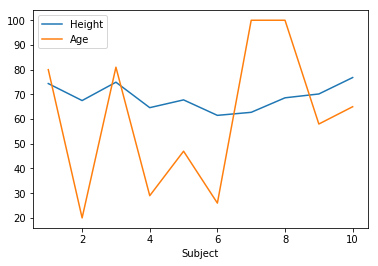

In [50]:
toy_df.plot()

### Barplot

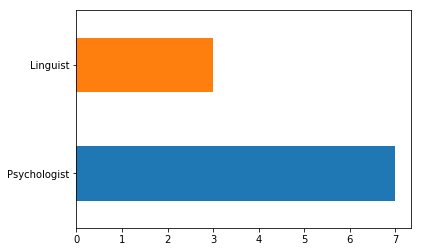

In [51]:
toy_df['Occupation'].value_counts().plot.barh()

### Boxplot

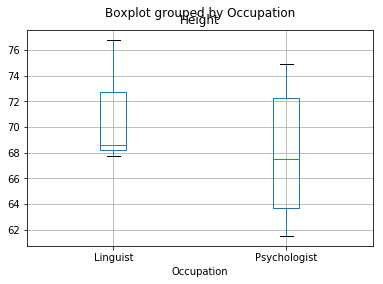

In [52]:
toy_df.boxplot(column="Height", by="Occupation")